# 安装配置MMSegmentation

按照顺序逐行运行本代码，即可安装配置 MMCV、MMSegmentation环境

推荐代码运行[云GPU环境](https://featurize.cn?s=d7ce99f842414bfcaea5662a97581bd1)：GPU RTX 3060、CUDA v11.3

作者：同济子豪兄 2023-1-11 6-11 6-25

> 提示：以下代码运行时，若长时间运行卡着不动，可重启 kernel 后重新运行一遍

## 安装Pytorch

https://pytorch.org

In [ ]:
# !pip3 install install torch==1.10.1+cu113 torchvision==0.11.2+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [5]:
import torch
torch.__version__

'1.10.0+cu113'

## 用MIM安装MMCV

In [7]:
!pip install -U openmim
!mim install mmengine
!mim install mmcv==2.0.0

## 安装其它工具包

In [9]:
!pip install opencv-python pillow matplotlib seaborn tqdm pytorch-lightning 'mmdet>=3.1.0' -i https://pypi.tuna.tsinghua.edu.cn/simple
# !pip install setuptools==59.5 prettytable

## 下载 MMSegmentation

In [10]:
# 删掉原有的 mmsegmentation 文件夹（如有）
!rm -rf mmsegmentation

In [12]:
# 从 github 上下载最新的 mmsegmentation 源代码

!git clone https://github.com/open-mmlab/mmsegmentation.git -b v1.1.2

# !git clone https://github.com/open-mmlab/mmsegmentation.git -b v1.2.0

In [13]:
# 进入主目录
import os
os.chdir('mmsegmentation')

## 安装 MMSegmentation

In [15]:
!pip install -v -e .

## 下载预训练模型权重文件和视频素材

In [16]:
import os

# 创建 checkpoint 文件夹，用于存放预训练模型权重文件
os.mkdir('checkpoint')

# 创建 outputs 文件夹，用于存放预测结果
os.mkdir('outputs')

# 创建 data 文件夹，用于存放图片和视频素材
os.mkdir('data')

# 创建 图表 文件夹，用于存放生成的图表
os.mkdir('图表')

# 创建 Zihao-Configs 文件夹，用于存放自己的语义分割模型的 config 配置文件
os.mkdir('Zihao-Configs')

## 检查安装成功

In [17]:
# 检查 Pytorch
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

Pytorch 版本 1.10.0+cu113
CUDA 是否可用 True


In [18]:
# 检查 mmcv
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

MMCV版本 2.0.0
CUDA版本 11.3
编译器版本 GCC 9.3


In [19]:
# 检查 mmsegmentation
import mmseg
from mmseg.utils import register_all_modules
from mmseg.apis import inference_model, init_model
print('mmsegmentation版本', mmseg.__version__)

mmsegmentation版本 1.1.2


没有报错，即证明安装成功。

## 设置Matplotlib中文字体

In [ ]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [ ]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [1]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 

matplotlib.rc("font",family='SimHei') # 中文字体

--2023-10-17 13:37:17--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  21.9MB/s    用时 0.4s    

2023-10-17 13:37:18 (21.9 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



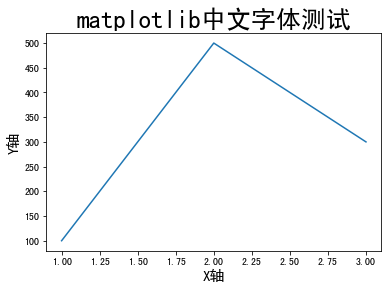

In [2]:
import matplotlib.pyplot as plt

plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()